In [1]:
# coding: utf-8
"""
Created on Sun Jul 30 12:32:59 2017
@author: DIP
@Copyright: Dipanjan Sarkar
"""

# # Import necessary dependencies
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import contractions_dict
import unicodedata

nlp = spacy.load('en_core_web_sm')
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


# # Cleaning Text - strip HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


# # Removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


# # Expanding Contractions
#def expand_contractions(text, contraction_mapping=contractions_dict):
    
#    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
#                                      flags=re.IGNORECASE|re.DOTALL)
#    def expand_match(contraction):
#        match = contraction.group(0)
#        first_char = match[0]
#        expanded_contraction = contraction_mapping.get(match) \
#                                   if contraction_mapping.get(match) \
#                                    else contraction_mapping.get(match.lower())                       
#        expanded_contraction = first_char+expanded_contraction[1:]
#        return expanded_contraction
        
#    expanded_text = contractions_pattern.sub(expand_match, text)
#    expanded_text = re.sub("'", "", expanded_text)
#    return expanded_text


# # Removing Special Characters
def remove_special_characters(text):
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    return text


# # Lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


# # Removing Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


# # Normalize text corpus - tying it all together
 #contraction_expansion=True,
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, text_lower_case=True, text_lemmatization=True, special_char_removal=True, stopword_removal=True):
    
    normalized_corpus = []
    
    for doc in corpus:
        
        if html_stripping:
            doc = strip_html_tags(doc)
        
        if accented_char_removal:
            doc = remove_accented_chars(doc)
            
 #       if contraction_expansion:
 #           doc = expand_contractions(doc)
            
        if text_lower_case:
            doc = doc.lower()
            
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        if special_char_removal:
            doc = remove_special_characters(doc)  
            
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

ModuleNotFoundError: No module named 'spacy'

In [2]:
#https://srome.github.io/Understanding-Attention-in-Neural-Networks-Mathematically/
'''Attention has been shown to help achieve state of the art performance on many tasks, 
but it is also has the obvious advantage of explaining important 
components of neural networks to a practitioner.'''
import numpy as np
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [5]:
df=pd.read_csv('/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/corr_data.csv')
# Ensure that text variables are strings
df.xxxAllText = df.xxxAllText.astype(str)
df.CorroKeyword = df.CorroKeyword.astype(str)
df

,CorroKeyword,xxxAllText,y
0,CHECK,ENG CHECKOUT PROCEDURE REQ PER TM 1-2840-248-2...,1
1,CHECK,MOC/ CHECK PROCEDURE FOR NEW AND REINSTALLED E...,1
2,CHECK,LMTF/MAX PWR CHECK REQUIRED FOR MAINTENANCE PE...,1
3,INSPECT,INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN ...,1
4,INSPECT,INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN ...,1
...,...,...,...
1406227,Failure Code - 002 Air Leak,AFT YELLOW ROD END NEEDS REPLACEMENT DUE TO PI...,1
1406228,Failure Code - 002 Air Leak,C-BOX AUX PRESS SWIITCH DOES NOT GIVE SIGNAL R...,1
1406229,Failure Code - 002 Air Leak,RAD ALT BACK LIGHT INOP PREFORMED OPERATIONAL ...,1
1406230,Failure Code - 002 Air Leak,AFT GREEN TROOP WARNING LIGHT INOP COULD NOT R...,1


In [20]:

# normalize corpus
norm_corpus = normalize_corpus(corpus=df['xxxAllText'], html_stripping=True, #contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True)

/opt/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/bs4/__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [21]:
norm_corpus

['eng checkout procedure req per tm 1 2840 248 23p wp 0111 table 1',
 'moc check procedure new reinstall engine wp 0110 00 due maintenance perform 1 engine agb complete iaw tm 1 1520 237mtf',
 'lmtf max pwr check require maintenance perform 1 engine agb per 1 2840 248 23p wp 0110 complete iaw tm 1 1520 237mtf',
 'insp a022 14 day flyable storage engine run due 12jul2018 upgrade red x status 14jul2018 runup complete',
 'insp a022 14 day flyable storage engine run due 26jul2018 upgrade x status 28jul2018 complete',
 'insp a022 14 day flyable storage engine run due 26jul2018 upgrade x status 28jul2018 complete',
 '2 eng oil comsumption ck req due oil seeping c sump seal',
 'main mod moc leak check due main mod oil filter replace drain plug remove reinstall moc complete fail leak check see fault 29 jul 18 3 iaw tm 1 1520 237mtf',
 'engine load demand push pull friction check require removal lds cable support complete insp ok',
 'run 2 engine least 10 minute let engine cool one hour minimum

In [22]:
# Replace contractions
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

# Usage
#replace_contractions("this's a text with contraction")

contr_cleaned_text = []
for text in norm_corpus:
    contr_cleaned_text.append(replace_contractions(text))

In [23]:
print(df.xxxAllText[0:10])
print(contr_cleaned_text[0:10])

0    ENG CHECKOUT PROCEDURE REQ PER TM 1-2840-248-2...
1    MOC/ CHECK PROCEDURE FOR NEW AND REINSTALLED E...
2    LMTF/MAX PWR CHECK REQUIRED FOR MAINTENANCE PE...
3    INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN ...
4    INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN ...
5    INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN ...
6    #2 ENG OIL COMSUMPTION CK REQ DUE TO OIL SEEPI...
7    MAIN MOD MOC/LEAK CHECK DUE ( MAIN MOD OIL FIL...
8    ENGINE LOAD DEMAND PUSH/PULL FRICTION CHECK RE...
9    RUN UP #2 ENGINE FOR AT LEAST 10 MINUTES. LET ...
Name: xxxAllText, dtype: object
['eng checkout procedure req per tm 1 2840 248 23p wp 0111 table 1', 'moc check procedure new reinstall engine wp 0110 00 due maintenance perform 1 engine agb complete iaw tm 1 1520 237mtf', 'lmtf max pwr check require maintenance perform 1 engine agb per 1 2840 248 23p wp 0110 complete iaw tm 1 1520 237mtf', 'insp a022 14 day flyable storage engine run due 12jul2018 upgrade red x status 14jul2018 runup complete', 

In [24]:
# remove numbers
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

num_contr_cleaned_text = []
for text in contr_cleaned_text:
    num_contr_cleaned_text.append(clean_numbers(text))

In [26]:
print(df.xxxAllText[0:10].values)
print(num_contr_cleaned_text[0:10])

['ENG CHECKOUT PROCEDURE REQ PER TM 1-2840-248-23&P WP 0111 TABLE 1'
 'MOC/ CHECK PROCEDURE FOR NEW AND REINSTALLED ENGINES WP 0110 00 DUE TO MAINTENANCE PERFORMED ON THE #1 ENGINE AGB COMPLETED IAW TM 1-1520-237-MTF'
 'LMTF/MAX PWR CHECK REQUIRED FOR MAINTENANCE PERFORM ON THE #1 ENGINE AGB AND AS PER 1-2840-248-23&P WP 0110 COMPLETED IAW TM 1-1520-237-MTF'
 'INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN UP. DUE AT: 12-JUL-2018. UPGRADE TO RED X STATUS ON 14-JUL-2018 RUNUP COMPLETE'
 'INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN UP. DUE AT: 26-JUL-2018. UPGRADE TO X STATUS ON 28-JUL-2018 COMPLETED'
 'INSP A022 - 14 DAY FLYABLE STORAGE ENGINE RUN UP. DUE AT: 26-JUL-2018. UPGRADE TO X STATUS ON 28-JUL-2018 COMPLETED'
 '#2 ENG OIL COMSUMPTION CK REQ DUE TO OIL SEEPING FROM C-SUMP SEAL'
 'MAIN MOD MOC/LEAK CHECK DUE ( MAIN MOD OIL FILTER REPLACED AND DRAIN PLUG REMOVED AND REINSTALLED) MOC COMPLETED, FAILED LEAK CHECK SEE FAULT # 29 JUL 18 #3 IAW TM 1-1520-237-MTF'
 'ENGINE LOAD DEMAND P

In [41]:
df['clean_text'] = num_contr_cleaned_text
df.to_csv('cleaned_corr_data.csv', encoding='utf-8', index=False)

In [28]:
import csv
# text that has been completely pre-processed
w = csv.writer(open("/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/norm_corpus.csv", "w"))
for text in num_contr_cleaned_text:
    w.writerow([text])

# Need to drop identical rows - this makes the network train lazily and probably why training on all the data makes the attention mechanism less accurate!

In [51]:
df['clean_text']

0          eng checkout procedure req per tm 1 #### ### #...
1          moc check procedure new reinstall engine wp ##...
2          lmtf max pwr check require maintenance perform...
3          insp a### ## day flyable storage engine run du...
4          insp a### ## day flyable storage engine run du...
                                 ...                        
1406227          aft yellow rod end need replacement due pit
1406228    c box aux press swiitch not give signal replac...
1406229    rad alt back light inop preform operational pr...
1406230    aft green troop warning light inop could not r...
1406231    sta ### nvg cabin light inop replace 2 dome li...
Name: clean_text, Length: 1406232, dtype: object

In [57]:
from progressbar import ProgressBar
pbar = ProgressBar()
seen = set()
uniq_docs = []
uniq_labels = []
for x, y in df[['clean_text','y']].values:
    if x not in seen:
        uniq_docs.append(x)
        uniq_labels.append(y)
        seen.add(x)

In [58]:
print(len(uniq_docs))
print(len(uniq_labels))

336848
336848


In [59]:
uniq_df = pd.DataFrame()
uniq_df['clean_text'] = uniq_docs
uniq_df['y'] = uniq_labels
uniq_df.to_csv('unique_cleaned_corr_data.csv', encoding='utf-8', index=False)

In [37]:
# get duplicates only
pbar = ProgressBar()
seen = set() 
dupe = set(x for x in pbar(num_contr_cleaned_text) if x in seen or seen.add(x))

100% |########################################################################|


In [38]:
len(dupe)

275952

In [39]:
w = csv.writer(open("/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/duplicates.csv", "w"))
for text in dupe:
    w.writerow([text])

## Start here for new session (load pkgs...)

In [2]:
import numpy as np
import pandas as pd
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

uniq_df = pd.read_csv('unique_cleaned_corr_data.csv')
uniq_df.clean_text = uniq_df.clean_text.astype(str)
uniq_df.dtypes

Using TensorFlow backend.


clean_text    object
y              int64
dtype: object

In [3]:
# tokenize text data
max_features = 10000
maxlen = 400

list_sentences = uniq_df['clean_text'].values
labels = uniq_df['y']

# Tokenize
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences))
list_tokenized = tokenizer.texts_to_sequences(list_sentences)

# create dictionaries to link words to their integer ids and the opposite
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

# Split into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(list_tokenized, labels, test_size=0.2, random_state=42)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Pad
from keras.preprocessing import sequence
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

269478 train sequences
67370 test sequences
Pad sequences (samples x time)
x_train shape: (269478, 400)
x_test shape: (67370, 400)


In [4]:
#Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

#word_counts: A dictionary of words and their counts.
#word_docs: A dictionary of words and how many documents each appeared in.
#word_index: A dictionary of words and their uniquely assigned integers.
#document_count:An integer count of the total number of documents that were used to fit the Tokenizer
#print(t.word_counts)
print(tokenizer.document_count) # total number of docs
len(tokenizer.word_index) # total number of words in the vocab (originally 94819 without removing stopwords)
#print(t.word_docs) 

336848


41402

In [5]:
print(list_tokenized[0:5])

vocab_size = []
n=1
for doc in list_tokenized:
    if len(doc) != 0:
        vocab_size.append(max(doc))
    else:
        next
max(vocab_size)+1

[[92, 2309, 764, 126, 89, 30, 6, 59, 32, 1185, 6], [24, 20, 764, 186, 70, 28, 32, 1, 90, 45, 6, 28, 1858, 4, 10, 30, 6, 144], [694, 1018, 1020, 20, 14, 90, 45, 6, 28, 1858, 89, 6, 59, 32, 4, 10, 30, 6, 144], [3, 2, 35, 482, 395, 28, 135, 1, 19, 9, 125, 8, 7, 19, 1794, 4], [3, 2, 35, 482, 395, 28, 135, 1, 19, 9, 8, 7, 19, 4]]


10000

In [6]:
# number of words that only appear 5 times or less (originally 54236)
n = 0
for count in tokenizer.word_counts.values():
    if count < 5:
        n = n+1
print(n)
# I NEED TO DROP THESE WORDS FROM THE VOCAB

30006


In [7]:
# find max document length (originally 2483)
# lengths = []
# for doc in uniq_docs:
#     lengths.append(len(doc))
# max(lengths)

In [8]:
from collections import Counter

trd = dict(Counter(y_train))
tsd = dict(Counter(y_test))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd],
            columns=['Target Label', 'Train Count', 'Test Count'])
 .sort_values(by=['Train Count', 'Test Count'], ascending=False))

,Target Label,Train Count,Test Count
1,1,202000,50338
0,0,67478,17032


### Bring in the pre-trained embeddings and load into embedding layer

In [10]:
# load the model 
from keras.models import load_model
# creates a HDF5 file 
model_embeds = load_model('/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/skip_grm_model.h5')

/Users/mh302/opt/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [11]:
#get the word embeddings
word_embed_layer = model_embeds.layers[2]
weights = word_embed_layer.get_weights()[0][0:]
print(weights.shape)

(41403, 100)


In [9]:
# create a dictionary (embeddings_index) of words to weights (or embedding vectors)
embeddings_index = {}
f = open('word_embeddings_df.csv') # this is embeddings and their words from SkipGramModel with window=10, epochs = 5
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 41403 word vectors.


In [12]:
# link the word embedding weights to the token indices from the preprocessed documents
#word_embeddings_df = pd.DataFrame(weights, index=id2word.values())
#word_embeddings_df.head()
embed_size = 100

embedding_matrix = np.zeros((len(word2id) + 1, embed_size))
for word, i in word2id.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [13]:
#build the Attention layer
from keras.layers import Activation, Concatenate, Permute, SpatialDropout1D, RepeatVector, LSTM, Bidirectional, Multiply, Lambda, Dense, Dropout, Input,Flatten,Embedding
from keras.models import Model
import keras.backend as K

class Attention:
    def __call__(self, inp, combine=True, return_attention=True):
        # Expects inp to be of size (?, number of words, embedding dimension)
        
        repeat_size = int(inp.shape[-1])
        
        # Map through 1 Layer MLP
        x_a = Dense(repeat_size, kernel_initializer = 'glorot_uniform', activation="tanh", name="tanh_mlp")(inp) 
        
        # Dot with word-level vector
        x_a = Dense(1, kernel_initializer = 'glorot_uniform', activation='linear', name="word-level_context")(x_a)
        x_a = Flatten()(x_a) # x_a is of shape (?,200,1), we flatten it to be (?,200)
        att_out = Activation('softmax')(x_a) 
        
        # Clever trick to do elementwise multiplication of alpha_t with the correct h_t:
        # RepeatVector will blow it out to be (?,120, 200)
        # Then, Permute will swap it to (?,200,120) where each row (?,k,120) is a copy of a_t[k]
        # Then, Multiply performs elementwise multiplication to apply the same a_t to each
        # dimension of the respective word vector
        x_a2 = RepeatVector(repeat_size)(att_out)
        x_a2 = Permute([2,1])(x_a2)
        out = Multiply()([inp,x_a2])
        
        if combine:
        # Now we sum over the resulting word representations
            out = Lambda(lambda x : K.sum(x, axis=1), name='expectation_over_words')(out)
        
        if return_attention:
            out = (out, att_out)
                   
        return out

In [14]:
# train a Bi-Directional LSTM to demonstrate the Attention class. The Bidirectional class in Keras 
#returns a tensor with the same number of time steps as the input tensor, but with the forward and 
#backward pass of the LSTM concatenated. The standard dimensions for this use case in Keras is: 
#(batch size, time steps, word embedding dimension).
lstm_shape = 60


# Define the model
inp = Input(shape=(maxlen,))
emb = Embedding(input_dim=max_features, input_length = maxlen, output_dim=embed_size)(inp)
x = SpatialDropout1D(0.35)(emb)
x = Bidirectional(LSTM(lstm_shape, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(x)
x, attention = Attention()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

attention_model = Model(inputs=inp, outputs=attention) # Model to print out the attention data

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 400, 100)     1000000     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 400, 100)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 400, 120)     77280       spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [14]:
#from keras.utils import plot_model
#import pydotplus as pydot

In [15]:
#pydot.find_graphviz()

In [17]:
# plot graph #USED python3 in tensorflow_cpu venv in the terminal to do this...
#plot_model(model, to_file='bidir_lstm_attn_graph.png')

In [22]:
# Fit the model
history = model.fit(x_train, y_train, validation_split=.2, epochs=3, verbose=1, batch_size=512)

/Users/mh302/opt/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 215582 samples, validate on 53896 samples
Epoch 1/3
215582/215582 [==============================] - 589s 3ms/step - loss: 0.3640 - accuracy: 0.8223 - val_loss: 0.2538 - val_accuracy: 0.8659
Epoch 2/3
215582/215582 [==============================] - 589s 3ms/step - loss: 0.2445 - accuracy: 0.8742 - val_loss: 0.2378 - val_accuracy: 0.8721
Epoch 3/3
215582/215582 [==============================] - 597s 3ms/step - loss: 0.2258 - accuracy: 0.8822 - val_loss: 0.2315 - val_accuracy: 0.8751


In [18]:
reverse_token_map = dict(map(reversed, tokenizer.word_index.items()))

In [19]:
# Error with reverse_token_map not defined...
def get_word_importances(text):
    lt = tokenizer.texts_to_sequences([text])
    x = pad_sequences(lt, maxlen=maxlen)
    p = model.predict(x)
    att = attention_model.predict(x)
    return p, [(reverse_token_map.get(word), importance) for word, importance in zip(x[0], att[0]) if word in reverse_token_map]

In [28]:
#get_word_importances(df['clean_text'].values[2])
get_word_importances('rust on door panel')

(array([[0.99074227]], dtype=float32),
 [('rust', 0.0024400898),
  ('on', 0.0024620192),
  ('door', 0.0024690006),
  ('panel', 0.00245885)])

In [21]:
from progressbar import ProgressBar

In [23]:
pbar = ProgressBar()
att_dict = {}
for text in pbar(uniq_df['clean_text']):
    lt = tokenizer.texts_to_sequences([text])
    x = pad_sequences(lt, maxlen=maxlen)
    att = attention_model.predict(x)
    for word, importance in zip(x[0], att[0]): 
        if word in reverse_token_map:
            att_dict[str(reverse_token_map.get(word))] = importance

100% |########################################################################|


In [24]:
# import multiprocessing
# from joblib import Parallel, delayed
# from tqdm import tqdm

# num_cores = multiprocessing.cpu_count()

# inputs = tqdm(uniq_df['clean_text'])

# #did this earlier: list_tokenized_train = tokenizer.texts_to_sequences(list_sentences)

# # Pad sequenses, did this earlier: X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

# def my_function(text, tokenizer=tokenizer, maxlen=maxlen, attention_model=attention_model):
#     att_dict = {} # start from scratch with each line of text
#     lt = tokenizer.texts_to_sequences([text]) # tokenize the words to sequences
#     x = pad_sequences(lt, maxlen=maxlen) # pad the sequences
#     att = attention_model.predict(x) # get word importance
#     for word, importance in zip(x[0], att[0]): # for each word (key) and its importance (value), write to att_dict
#         if word in reverse_token_map:
#             att_dict[str(reverse_token_map.get(word))] = importance
#     return att_dict # return the key, value pairs

# if __name__ == "__main__":  #protects the entry point of the program 
#     processed_list = Parallel(n_jobs=num_cores)(delayed(my_function)(text) for text in inputs)

In [83]:

import csv

w = csv.writer(open("/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/att_dict_attn_mdl_pretrnd_embd.csv", "w"))
for key, val in att_dict.items():
    w.writerow([key, val])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/johncase/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/att_dict_attn_mdl_cpy1.csv'

In [27]:
important_words = sorted(att_dict, key=att_dict.__getitem__, reverse=True)[0:50]
important_words

['trouble',
 'dgns',
 'logged',
 'robinson',
 'disable',
 'nounstrut',
 'preserve',
 'rdps',
 'calvin',
 'gunner',
 'botom',
 'movment',
 'comm4',
 'sctructural',
 'rsu',
 'febr',
 'dcp',
 'lube',
 'cq',
 'sgr8',
 'insertion',
 'departure',
 'pmi2',
 'manipulate',
 'hqii',
 'phoenix',
 'rentention',
 'enviorment',
 'nvgs',
 '4a4',
 '7aug',
 'entry',
 'blended',
 'harware',
 'esss',
 'attitude',
 'jj',
 'nounbrake',
 '4a2',
 'mcfadden',
 'doubler',
 '3na',
 'palletize',
 'erd',
 'chkd',
 'microphone',
 'spinning',
 'amss',
 'describe',
 'm0c']

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [23]:
import matplotlib.pyplot as plt

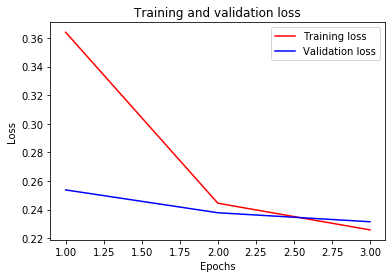

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

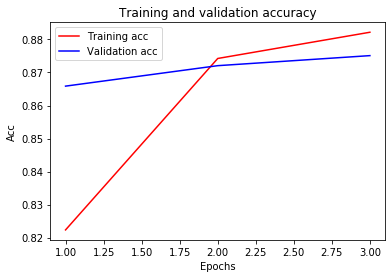

In [28]:

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [18]:
#model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [30]:
# https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/ 
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = [round(pred[0]) for pred in yhat_probs]
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n), the ratio of correctly predicted observation to the total observations.
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp), the ratio of correctly predicted positive observations to the total predicted positive observations
# If precision is high, we are making correct corrosion tags, but possibly missing corrosion items
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn), ratio of correctly predicted positive observations to the all observations in actual class
# So if recall is low, we are missing actual corrosion actions
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn), the weighted average of Precision and Recall
# If this is high, we are making correct corrosion tags and not missing actions that should be corrosion.
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.875776
Precision: 0.927270
Recall: 0.904704
F1 score: 0.915848


In [31]:
# Save or load the model
from keras.models import load_model
# creates a HDF5 file 
model.save('/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/atn_model_norm_corpus_unique_pretrn_emb.h5')

In [17]:
from keras.models import load_model
model = load_model('/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/atn_model_norm_corpus_unique_pretrn_emb.h5')


/Users/mh302/opt/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
